In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import missingno as msno
import missingno as msno

import warnings

import math
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')
# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("worker_data.csv")

print(df.columns.tolist())

['tottr', 'hhmem', 'mode_category', 'duration_min', 'trip_distance_miles', 'arr_time', 'dep_time', 'city_from_zip', 'travel_date', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'job_count', 'empl_sec_loc', 'workday_count', 'hour_per_week', 'workday_flex', 'commute_mode', 'empl_industry', 'empl_occupation', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'education', 'person_trips', 'race', 'workday_range', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'home_city', 'vehicle_op_count', 'home_primarycity', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership'

In [3]:
# Calculate the percentage of each unique value
value_counts = df['mode_category'].value_counts(normalize=True) * 100
 
# Display the results
print(value_counts)

mode_category
5.0     72.220528
1.0     10.817204
6.0     10.282074
2.0      1.789375
15.0     1.185908
24.0     0.837915
7.0      0.547746
8.0      0.419483
26.0     0.390046
25.0     0.255475
11.0     0.226037
10.0     0.216575
16.0     0.161906
9.0      0.129314
13.0     0.123006
14.0     0.094620
28.0     0.043105
27.0     0.038899
19.0     0.037848
18.0     0.035745
4.0      0.032591
23.0     0.028386
29.0     0.028386
21.0     0.026283
17.0     0.010513
22.0     0.007359
3.0      0.006308
12.0     0.004205
20.0     0.003154
Name: proportion, dtype: float64


In [4]:
def categorize_mode(mode):
    if mode in [1,2, 3, 4]:  # Walk, bike, wheelchair/mobility scooter, other non-motorized
        return 'Active Transportation'
    elif mode in [5,8,10]:  # Auto Driver, motorcycle, rental car
        return 'Auto Driver'
    elif mode in [6,7,9]:  # Auto Passenger, Carpool, taxi
        return 'Auto Passenger'
    elif mode in [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]:  # Transit modes
        return 'Transit'
    else:  # Everything else
        return 'Other'

In [5]:
# Apply the categorization function to the 'Mode of transport' column
df['mode_category'] = df['mode_category'].astype(int).apply(categorize_mode)

# Calculate the percentage of each mode in the dataset
mode_percentage = df['mode_category'].value_counts(normalize=True) * 100

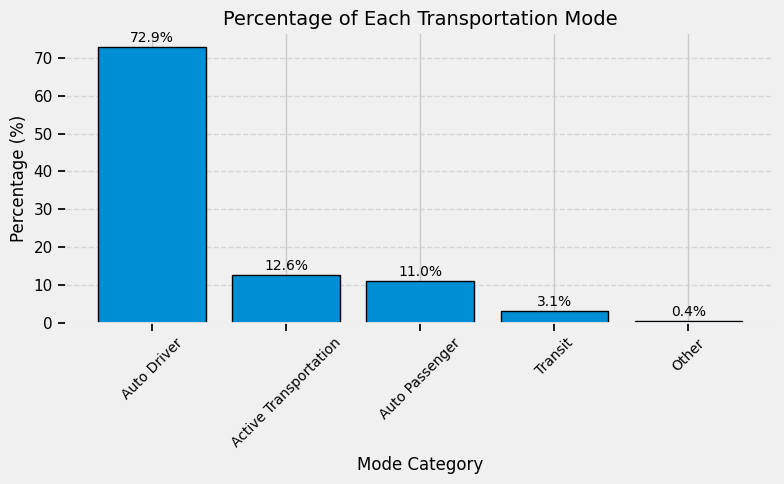

In [6]:
# Plot the percentages as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(mode_percentage.index, mode_percentage, edgecolor='black')
 
# Overlay the percentage values on the bars
for bar, percentage in zip(bars, mode_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.5,  # Y-coordinate
        f'{percentage:.1f}%',  # Text to display
        ha='center', va='bottom', fontsize=10, color='black'  # Alignment and style
    )
 
# Add chart details
plt.title('Percentage of Each Transportation Mode', fontsize=14)
plt.xlabel('Mode Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
df.describe()

,tottr,hhmem,duration_min,trip_distance_miles,gender,age,citizen,driver_license,transit_pass,car_sharing,...,snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
count,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,...,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000,95117.000000
mean,1.534184,0.404765,20.922706,10.351823,1.482080,49.766729,1.175121,1.029311,1.854011,1.978879,...,0.024051,1.572316,1783.505272,2.542963,0.949988,1.278436,0.957211,1.028407,2.561256,1.788461
std,0.980701,0.798897,29.397184,72.665468,0.499681,11.539533,0.380073,0.168678,0.353097,0.143790,...,0.543124,4.256362,626.641932,2.445004,0.435130,0.631536,0.432619,0.534613,1.686343,0.741923
min,1.000000,0.000000,1.000000,0.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.000000,1.212947,1.000000,42.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,1999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,1.000000,0.000000,15.000000,3.331786,1.000000,51.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,2004.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,2.000000,1.000000,25.000000,9.577176,2.000000,58.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,2007.000000,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000
max,31.000000,5.000000,1080.000000,15815.056366,2.000000,94.000000,2.000000,2.000000,2.000000,2.000000,...,35.210000,24.000000,2013.000000,13.000000,5.000000,2.000000,4.000000,3.000000,7.000000,6.000000


In [8]:
df['mode_category'].unique()

array(['Auto Driver', 'Active Transportation', 'Transit',
       'Auto Passenger', 'Other'], dtype=object)

# General EDA

In [9]:
# check for numeric values 
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numeric columns:")
print(numeric_columns)

Numeric columns:
['tottr', 'hhmem', 'duration_min', 'trip_distance_miles', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'job_count', 'empl_sec_loc', 'workday_count', 'hour_per_week', 'workday_flex', 'commute_mode', 'empl_industry', 'empl_occupation', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'education', 'person_trips', 'race', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'vehicle_op_count', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinders', 'veh_type']


## Catergorical Features

Here, we observe that not all columns are numerical variables; some are encoded categorical variables. Let’s separate them accordingly after binning model year.

(Insights from later EDA) - Model year appears to have a wide range of values, including a significant number of entries for 0, representing “No Car”. The current distribution is not very clear due to the range and sparse data in other values. To address this, binning the model year into broader categories, such as ranges of years, can improve the visualization and interpretability of this feature. Let’s use the binned version to analyze its potential impact more effectively.

In [10]:
def bin_model_year(year):
    if year == 0:
        return 'No Car'
    elif year < 2000:
        return 'Before 2000'
    elif 2000 <= year <= 2013:
        return '2000-2013'
    else:
        return 'Unknown'

df['model_year'] = df['model_year'].apply(bin_model_year)

Categorical columns are separated based on the number of unique values. Columns with up to three categories work well with stacked bar charts, while those with more MAY require different visualizations or more space to avoid clutter. This ensures the plots are clear and easy to interpret.

In [11]:
'gender', 'age', 'citizen', 'driver_license', 
'transit_pass', 'car_sharing', 'employment', 
'job_count', 'empl_sec_loc', 'workday_count', 'hour_per_week', 
'workday_flex', 'commute_mode', 'empl_industry', 'empl_occupation', 
'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 
'student', 'education', 'person_trips', 'race', 'incentive', 'vehicle_count', 
'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 
'student_count', 'license_count', 'trip_count', 'vehicle_op_count', 
'model_year', 'body_type', 'fuel_type1', 'purchase_type', 
'ownership', 'transmission', 'cylinders', 'veh_type'

('ownership', 'transmission', 'cylinders', 'veh_type')

In [12]:
# List of columns to plot
categorical_columns = ['gender', 'citizen', 'driver_license', 'transit_pass', 'job_count',
                       'car_sharing', 'education', 'incentive', 'race', 'employment',
                       'residence_type', 'home_own', 'income', 'WMO_code', 'empl_occupation',
                       'transit_subsidy', 'disabled', 'worker_count', 'empl_industry',
                       'body_type', 'fuel_type1', 'purchase_type', 'model_year', 'worker_count',
                       'transmission', 'veh_type', 'cylinders', 'ownership', 'student']

# Compute unique counts for the categorical columns
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Lists based on conditions
simple_categorical_columns = [col for col, count in unique_counts.items() if count <= 3]
complex_categorical_columns = [col for col, count in unique_counts.items() if count > 3]

print("Categorical Columns with up to 3 types:", simple_categorical_columns)
print("Categorical Columns with more than 3 types:", complex_categorical_columns)

Categorical Columns with up to 3 types: ['gender', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'incentive', 'employment', 'home_own', 'transit_subsidy', 'disabled', 'purchase_type', 'model_year', 'student']
Categorical Columns with more than 3 types: ['job_count', 'education', 'race', 'residence_type', 'income', 'WMO_code', 'empl_occupation', 'worker_count', 'empl_industry', 'body_type', 'fuel_type1', 'transmission', 'veh_type', 'cylinders', 'ownership']


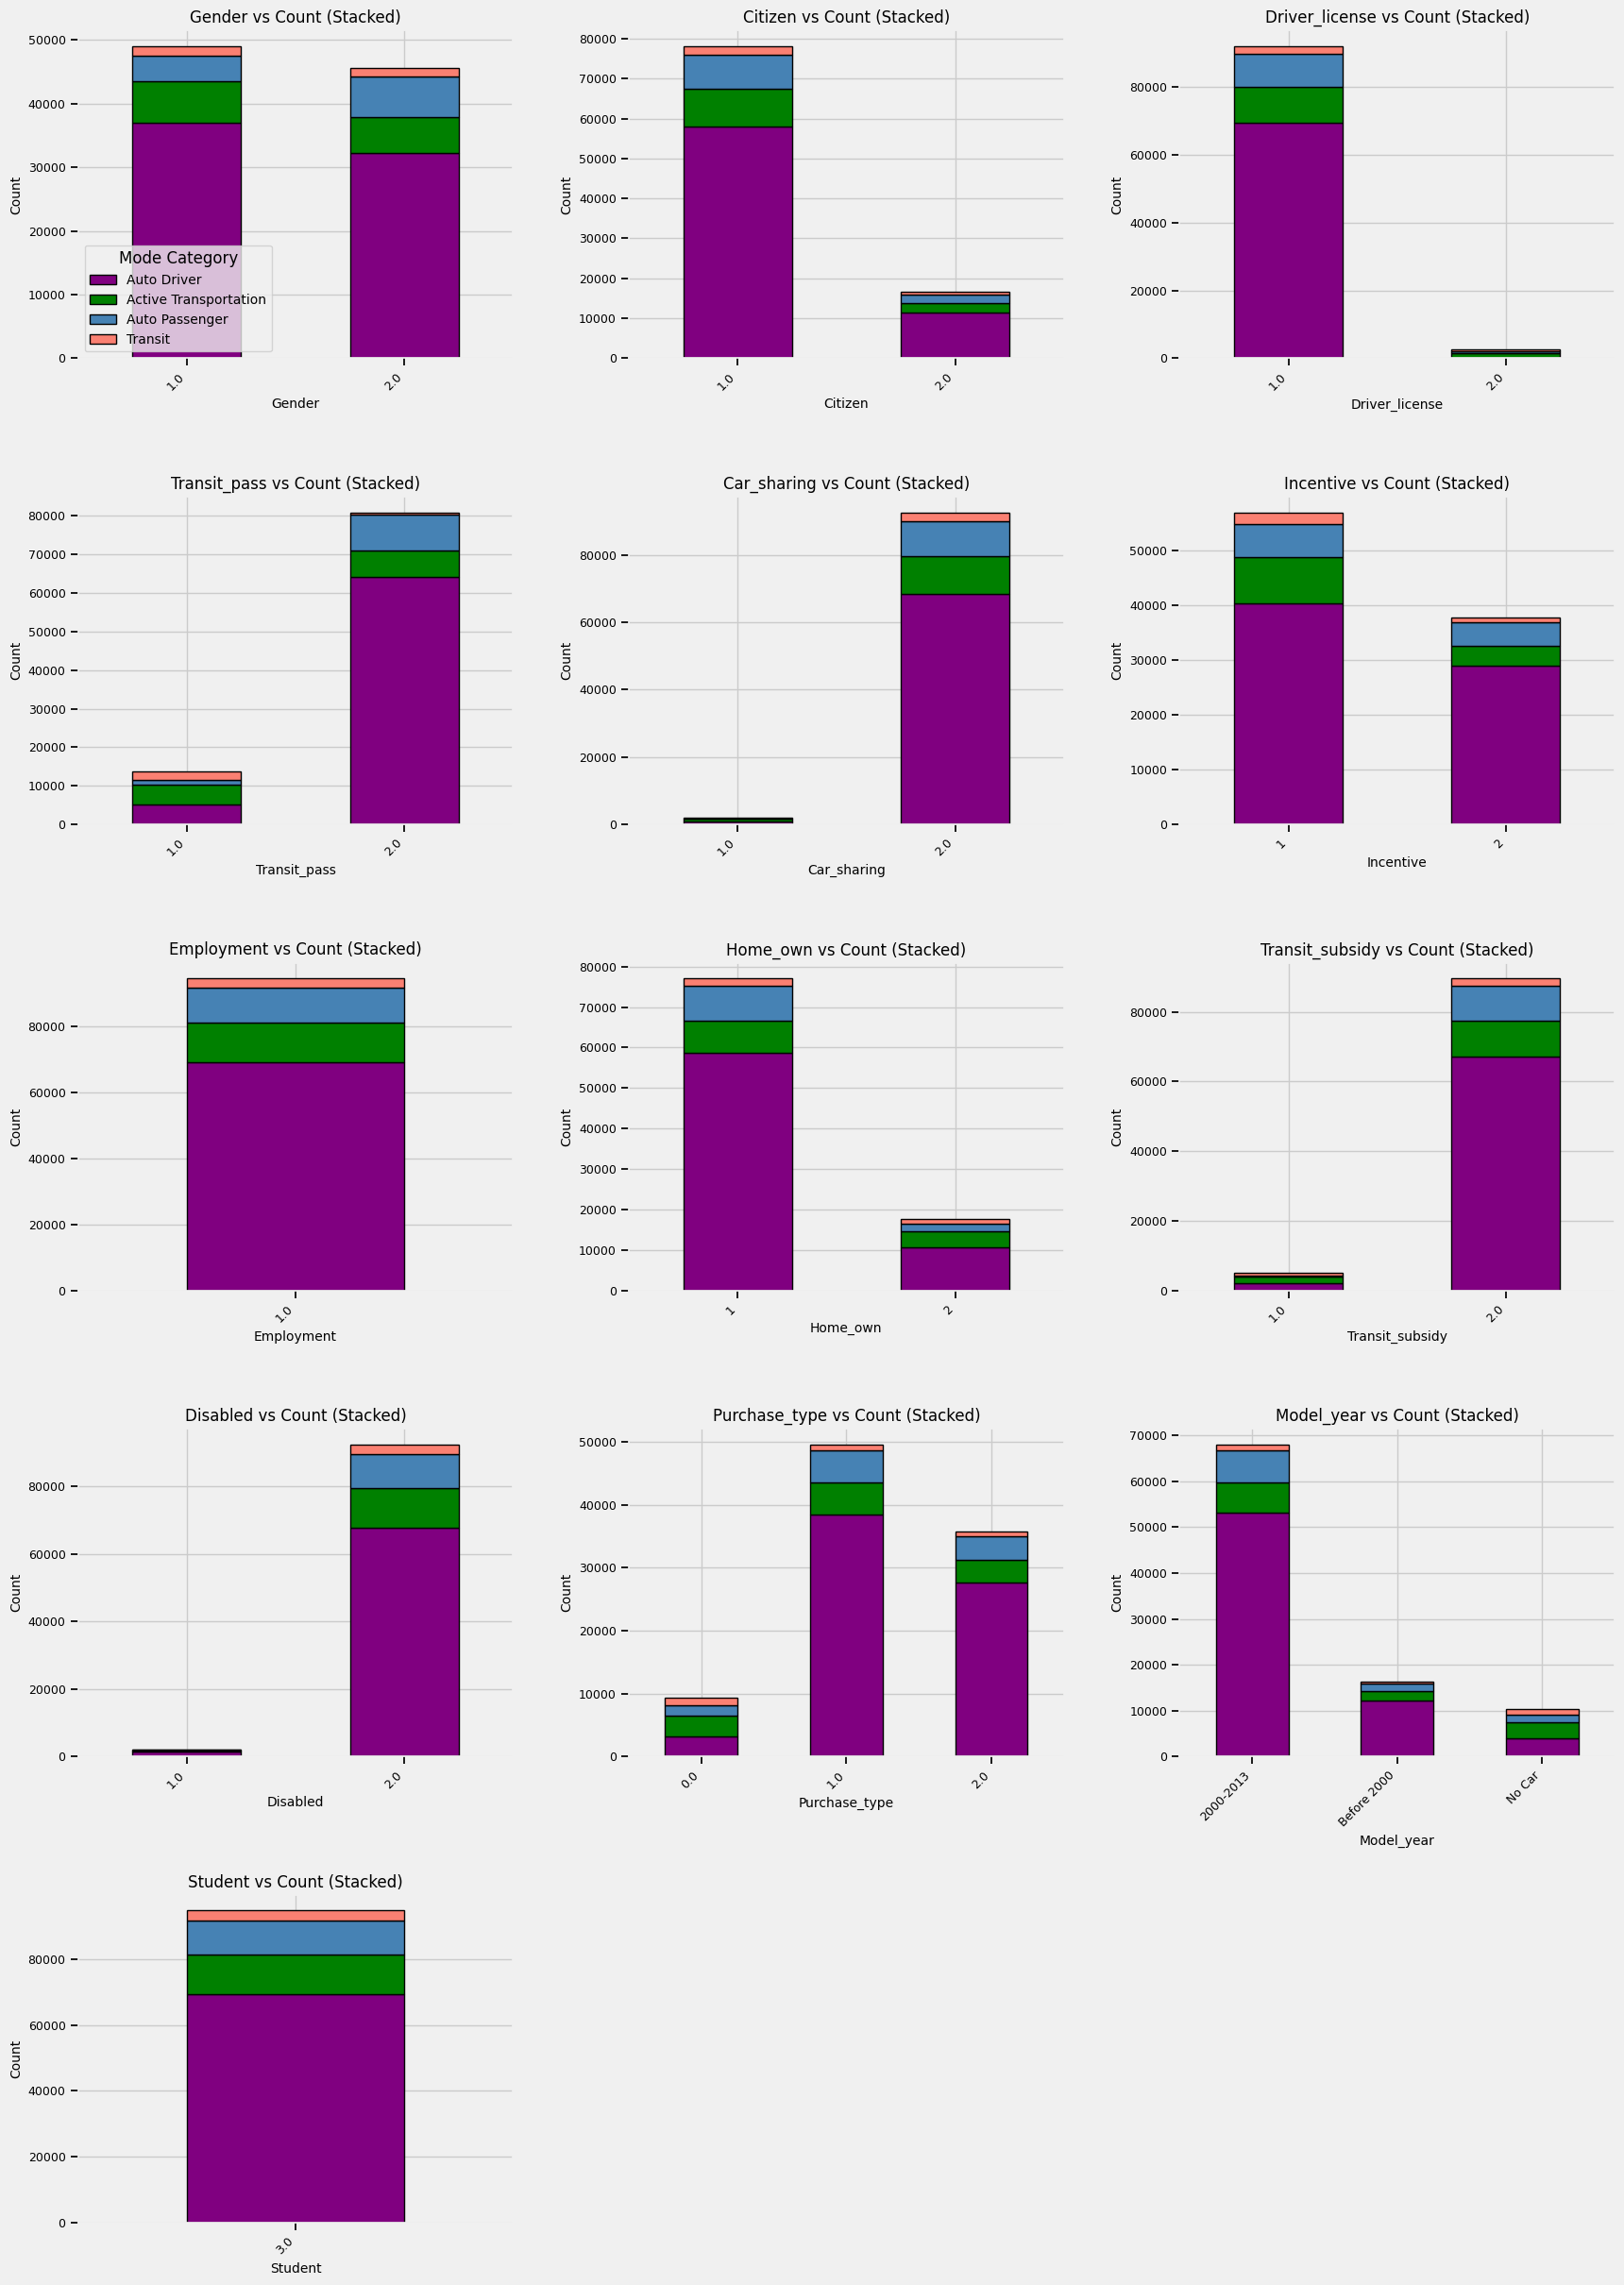

In [13]:
# Define custom colors for the mode categories
custom_colors = {
    'Active Transportation': 'green',
    'Auto Driver': 'purple',
    'Auto Passenger': 'steelblue',
    'Transit': 'salmon'
}

# Filter for specific mode categories
modes_to_plot = ['Auto Driver', 'Active Transportation', 'Auto Passenger', 'Transit']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(simple_categorical_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, column in enumerate(simple_categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Prepare data for stacked bar plot
    stacked_data = df_filtered.groupby([column, 'mode_category']).size().unstack(fill_value=0)
    
    # Ensure the order of columns in stacked_data matches the custom_colors dictionary
    stacked_data = stacked_data[modes_to_plot]  # Reorder columns explicitly
    
    # Plot the data with corrected colors
    stacked_data.plot(
        kind='bar',  # Vertical bar plot
        stacked=True, 
        ax=plt.gca(), 
        color=[custom_colors[col] for col in stacked_data.columns],  # Ensure matching colors
        edgecolor="black"
    )
    
    # Add titles and axis labels
    plt.title(f'{column.capitalize()} vs Count (Stacked)', fontsize=12)
    plt.ylabel('Count', fontsize=10)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.xticks(fontsize=9, rotation=45, ha='right')
    plt.yticks(fontsize=9)
    
    # Place the legend only on the first plot
    if i == 0:
        plt.legend(title='Mode Category', fontsize=10, loc='best')
    else:
        plt.legend([], [], frameon=False)  # Remove legends from subsequent plots

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

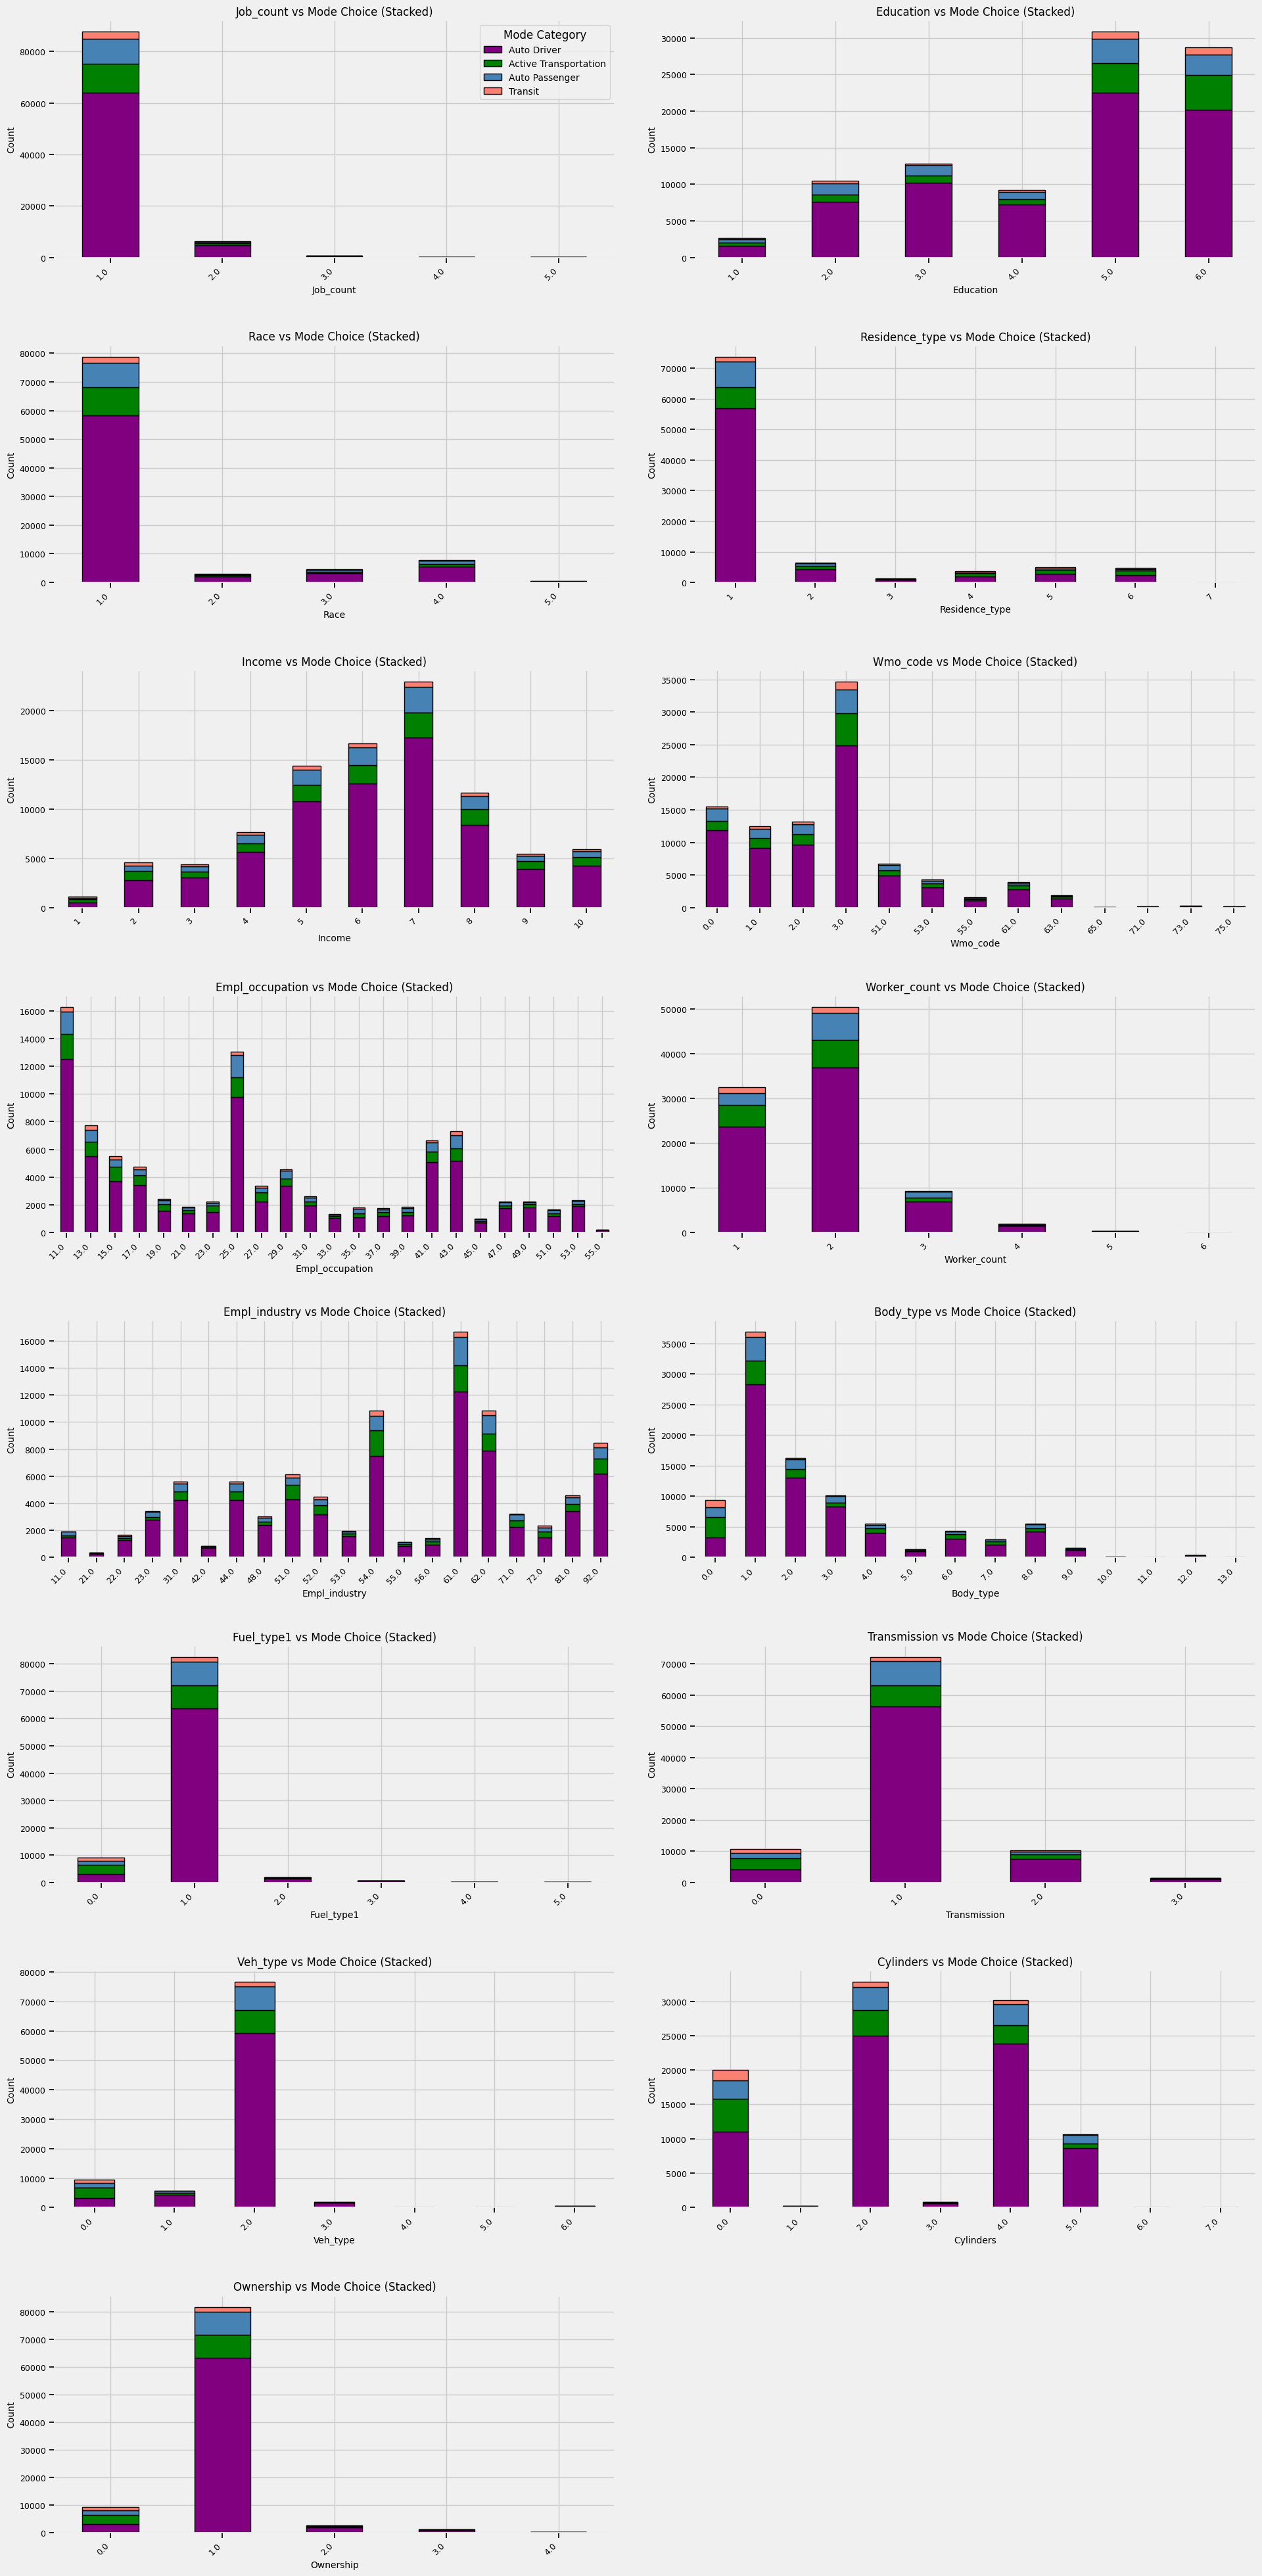

In [14]:
# Filter for specific mode categories
modes_to_plot = ['Auto Driver', 'Active Transportation', 'Auto Passenger', 'Transit']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Determine grid size
n_cols = 2
n_rows = math.ceil(len(complex_categorical_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 10, n_rows * 5))  # Increase the width of the figure

for i, column in enumerate(complex_categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Group data for stacked bar plot
    stacked_data = df_filtered.groupby([column, 'mode_category']).size().unstack(fill_value=0)
    stacked_data = stacked_data[modes_to_plot]  # Ensure consistent order of mode categories
    
    # Create the stacked bar plot
    stacked_data.plot(
        kind='bar',
        stacked=True,
        ax=plt.gca(),
        color=[custom_colors[col] for col in modes_to_plot],  # Use custom colors
        edgecolor="black"
    )
    
    # Add titles and axis labels
    plt.title(f'{column.capitalize()} vs Mode Choice (Stacked)', fontsize=12)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    
    # Place legend only on the first subplot
    if i == 0:
        plt.legend(title='Mode Category', fontsize=10, loc='upper right')
    else:
        plt.legend([], [], frameon=False)  # Remove legend from subsequent plots

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

## Numercial Weather Features

### Why Separate Variables and Filter Zeros?

For weather-related features like `total_precip (mm)`, `rain (mm)`, `snowfall (cm)`, and `precip_hours (h)`, the majority of the values are zero, representing days without precipitation or snowfall (which makes sense since the dataset is in California). Including these zeros in the plots would overshadow any potential trends in data, making it hard to understand how these variables influence mode choice.

We chose box plots because they are great for comparing the distribution of continuous variables across categories, like mode choices. Box plots highlight the median, range, and outliers, making it easier to see differences in how variables like temperature or precipitation vary for each mode category. This is particularly useful for identifying trends that might help predict mode choice.

Separating the variables into different plots and filtering out zeros where necessary ensures the visualizations are clear and focused. This approach makes the data easier to interpret and helps identify which features are most relevant for building predictive models.

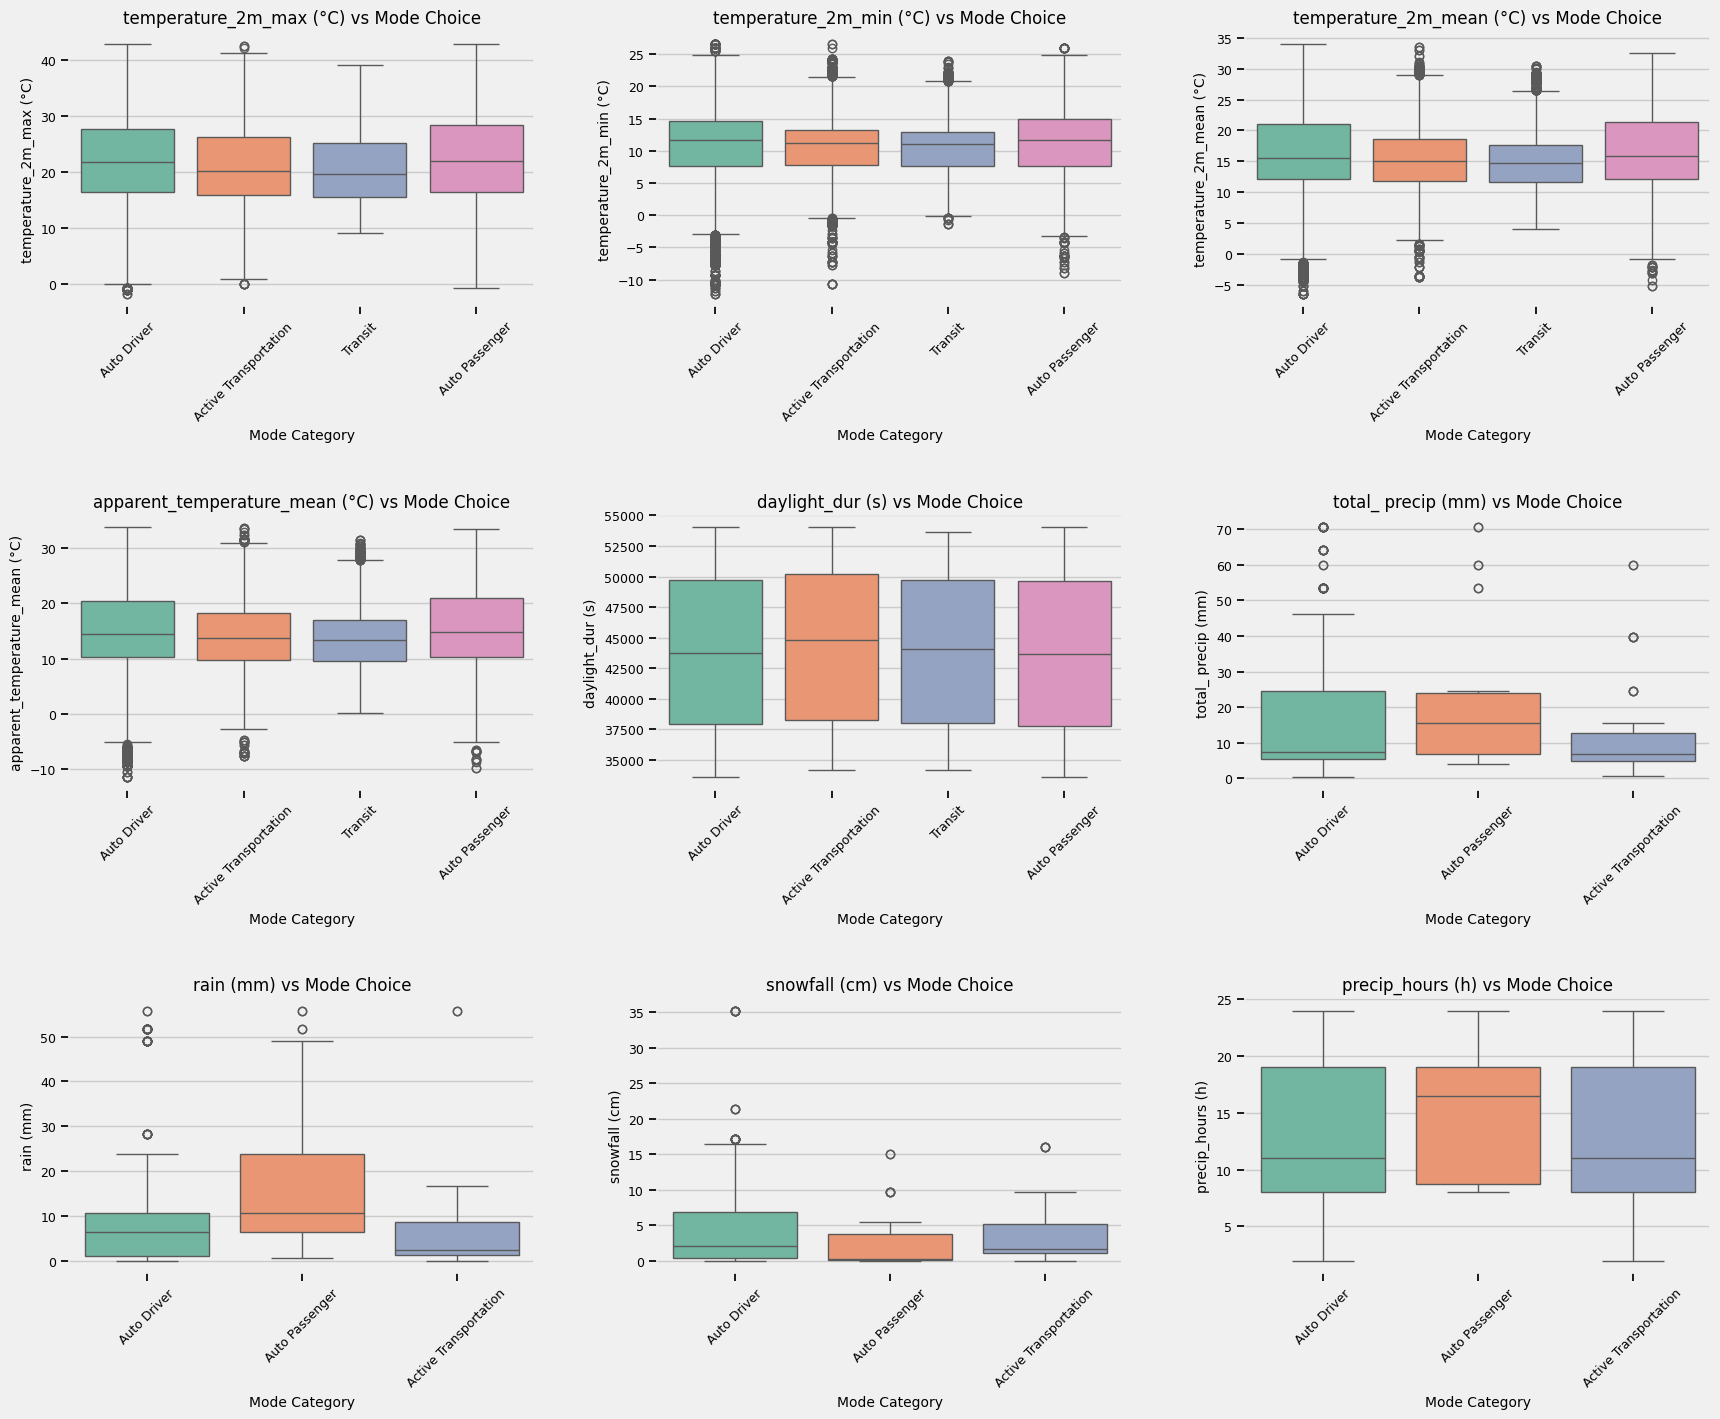

In [15]:
# Correct the feature names in numeric_weather_features
numeric_weather_features = [
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'daylight_dur (s)',
    'total_ precip (mm)',
    'rain (mm)',
    'snowfall (cm)',
    'precip_hours (h)'
]

# Ensure 'mode_category' matches the specified modes
modes_to_plot = ['Auto Driver', 'Active Transportation', 'Auto Passenger', 'Transit']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Features to filter for non-zero values
features_to_filter = ['total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)']

# Create a copy of the dataset and filter out rows where these features are zero
df_filtered_nonzero = df_filtered.copy()
for feature in features_to_filter:
    df_filtered_nonzero = df_filtered_nonzero[df_filtered_nonzero[feature] > 0]

# Create the plot grid
n_cols = 3
n_rows = math.ceil(len(numeric_weather_features) / n_cols)
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, feature in enumerate(numeric_weather_features):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Select the appropriate dataset (filtered for non-zero values for the last four features)
    data_to_plot = (
        df_filtered_nonzero if feature in features_to_filter else df_filtered
    )
    
    # Create box plots to compare distributions for mode categories
    sns.boxplot(
        data=data_to_plot,
        x='mode_category',
        y=feature,
        palette='Set2'
    )
    
    plt.title(f'{feature} vs Mode Choice', fontsize=12)
    plt.xlabel('Mode Category', fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks(rotation=45, fontsize=9)
    plt.yticks(fontsize=9)

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

Now let's look at the remaining numerical variables.

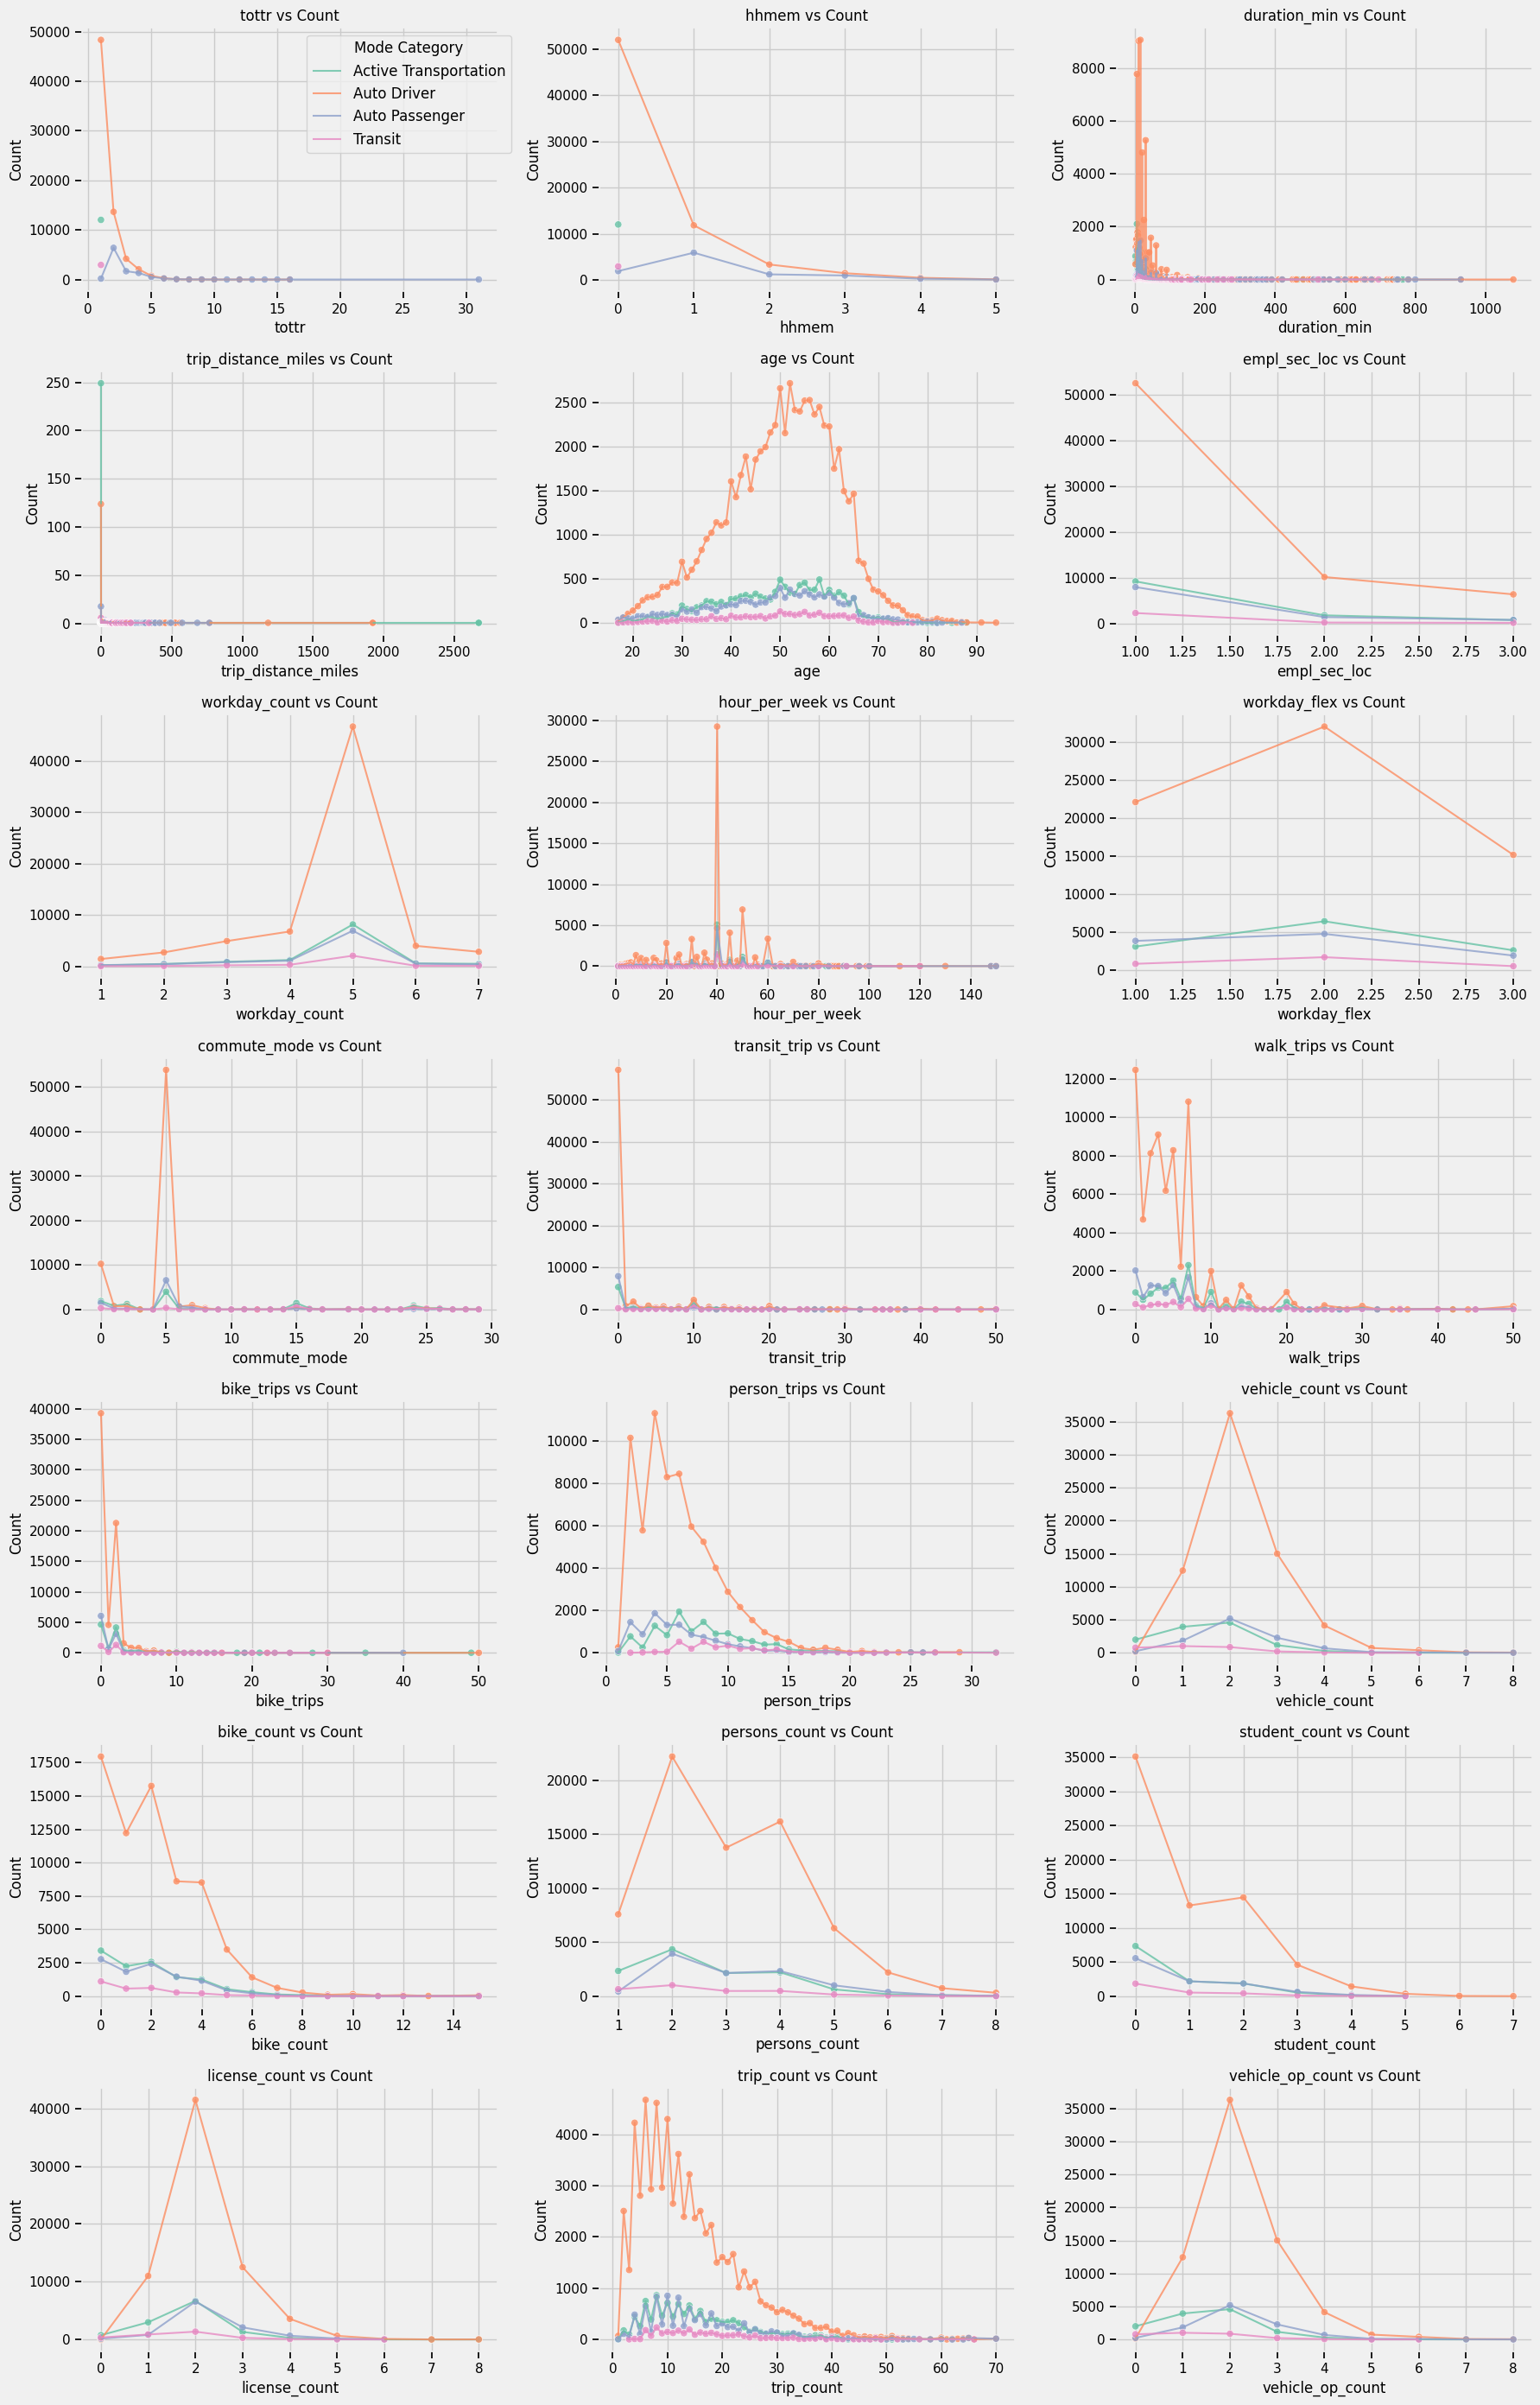

In [16]:
# Update numeric columns and exclude categorical ones
numeric_columns = [
    col for col in numeric_columns 
    if col not in categorical_columns and col not in numeric_weather_features]

# Ensure 'mode_category' matches the specified modes
modes_to_plot = ['Auto Driver', 'Active Transportation', 'Auto Passenger', 'Transit']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, feature in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Group data by numeric feature and mode to calculate counts
    grouped_data = df_filtered.groupby(['mode_category', feature]).size().reset_index(name='count')
    
    # Line plot for the current feature
    sns.lineplot(
        data=grouped_data,
        x=feature,
        y='count',
        hue='mode_category',
        palette='Set2',
        alpha=0.8
    )
    
    # Scatter plot over the line to show individual points
    sns.scatterplot(
        data=grouped_data,
        x=feature,
        y='count',
        hue='mode_category',
        palette='Set2',
        alpha=0.8,
        legend=False  # Avoid duplicate legends
    )
    
    plt.title(f'{feature} vs Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Only add the legend once
    if i == 0:
        plt.legend(title='Mode Category', bbox_to_anchor=(1.05, 1), loc='best', fontsize=12)
    else:
        plt.legend([], [], frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()

# to complete markdown with analysis

# Temporal Features EDA

In [17]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['mode_category', 'arr_time', 'dep_time', 'city_from_zip', 'travel_date', 'workday_range', 'home_city', 'home_primarycity', 'model_year']


In [18]:
# Combine travel_date and dep_time into a single datetime column
df_filtered['departure_datetime'] = pd.to_datetime(df_filtered['travel_date'] + ' ' + df_filtered['dep_time'])

# Drop the original travel_date and dep_time columns if no longer needed
df_filtered = df_filtered.drop(columns=['travel_date', 'dep_time'])

# Drop the redundant columns
df_filtered = df_filtered.drop(columns=['home_primarycity', 'home_city', 'arr_time'])

In [19]:
# Create a DataFrame with only non-numeric columns
df_non_numeric = df_filtered[df_filtered.select_dtypes(exclude=['number']).columns.tolist()]

# Display the DataFrame with non-numeric columns
df_non_numeric.head()

,mode_category,city_from_zip,workday_range,model_year,departure_datetime
0,Auto Driver,Greater Los Angeles Area,"[8, nan, nan, nan, nan, nan, nan]",2000-2013,2012-05-12 08:15:00
1,Auto Driver,Greater Los Angeles Area,"[8, nan, nan, nan, nan, nan, nan]",2000-2013,2012-05-12 15:30:00
2,Auto Driver,Greater Los Angeles Area,"[8, nan, nan, nan, nan, nan, nan]",2000-2013,2012-05-12 16:30:00
3,Auto Driver,Greater Los Angeles Area,"[8, nan, nan, nan, nan, nan, nan]",2000-2013,2012-05-12 17:40:00
4,Auto Driver,Greater Los Angeles Area,"[8, nan, nan, nan, nan, nan, nan]",2000-2013,2012-05-12 18:40:00


Before proceeding, especially for splitting later on, let's check for missing values.

In [20]:
# Check for null values in numeric columns
null_counts = df_filtered.isnull().sum()

# Print columns with null values
print("Numeric columns with null or NaN values:")
print(null_counts[null_counts > 0])

Numeric columns with null or NaN values:
Series([], dtype: int64)


## Temporal Features EDA

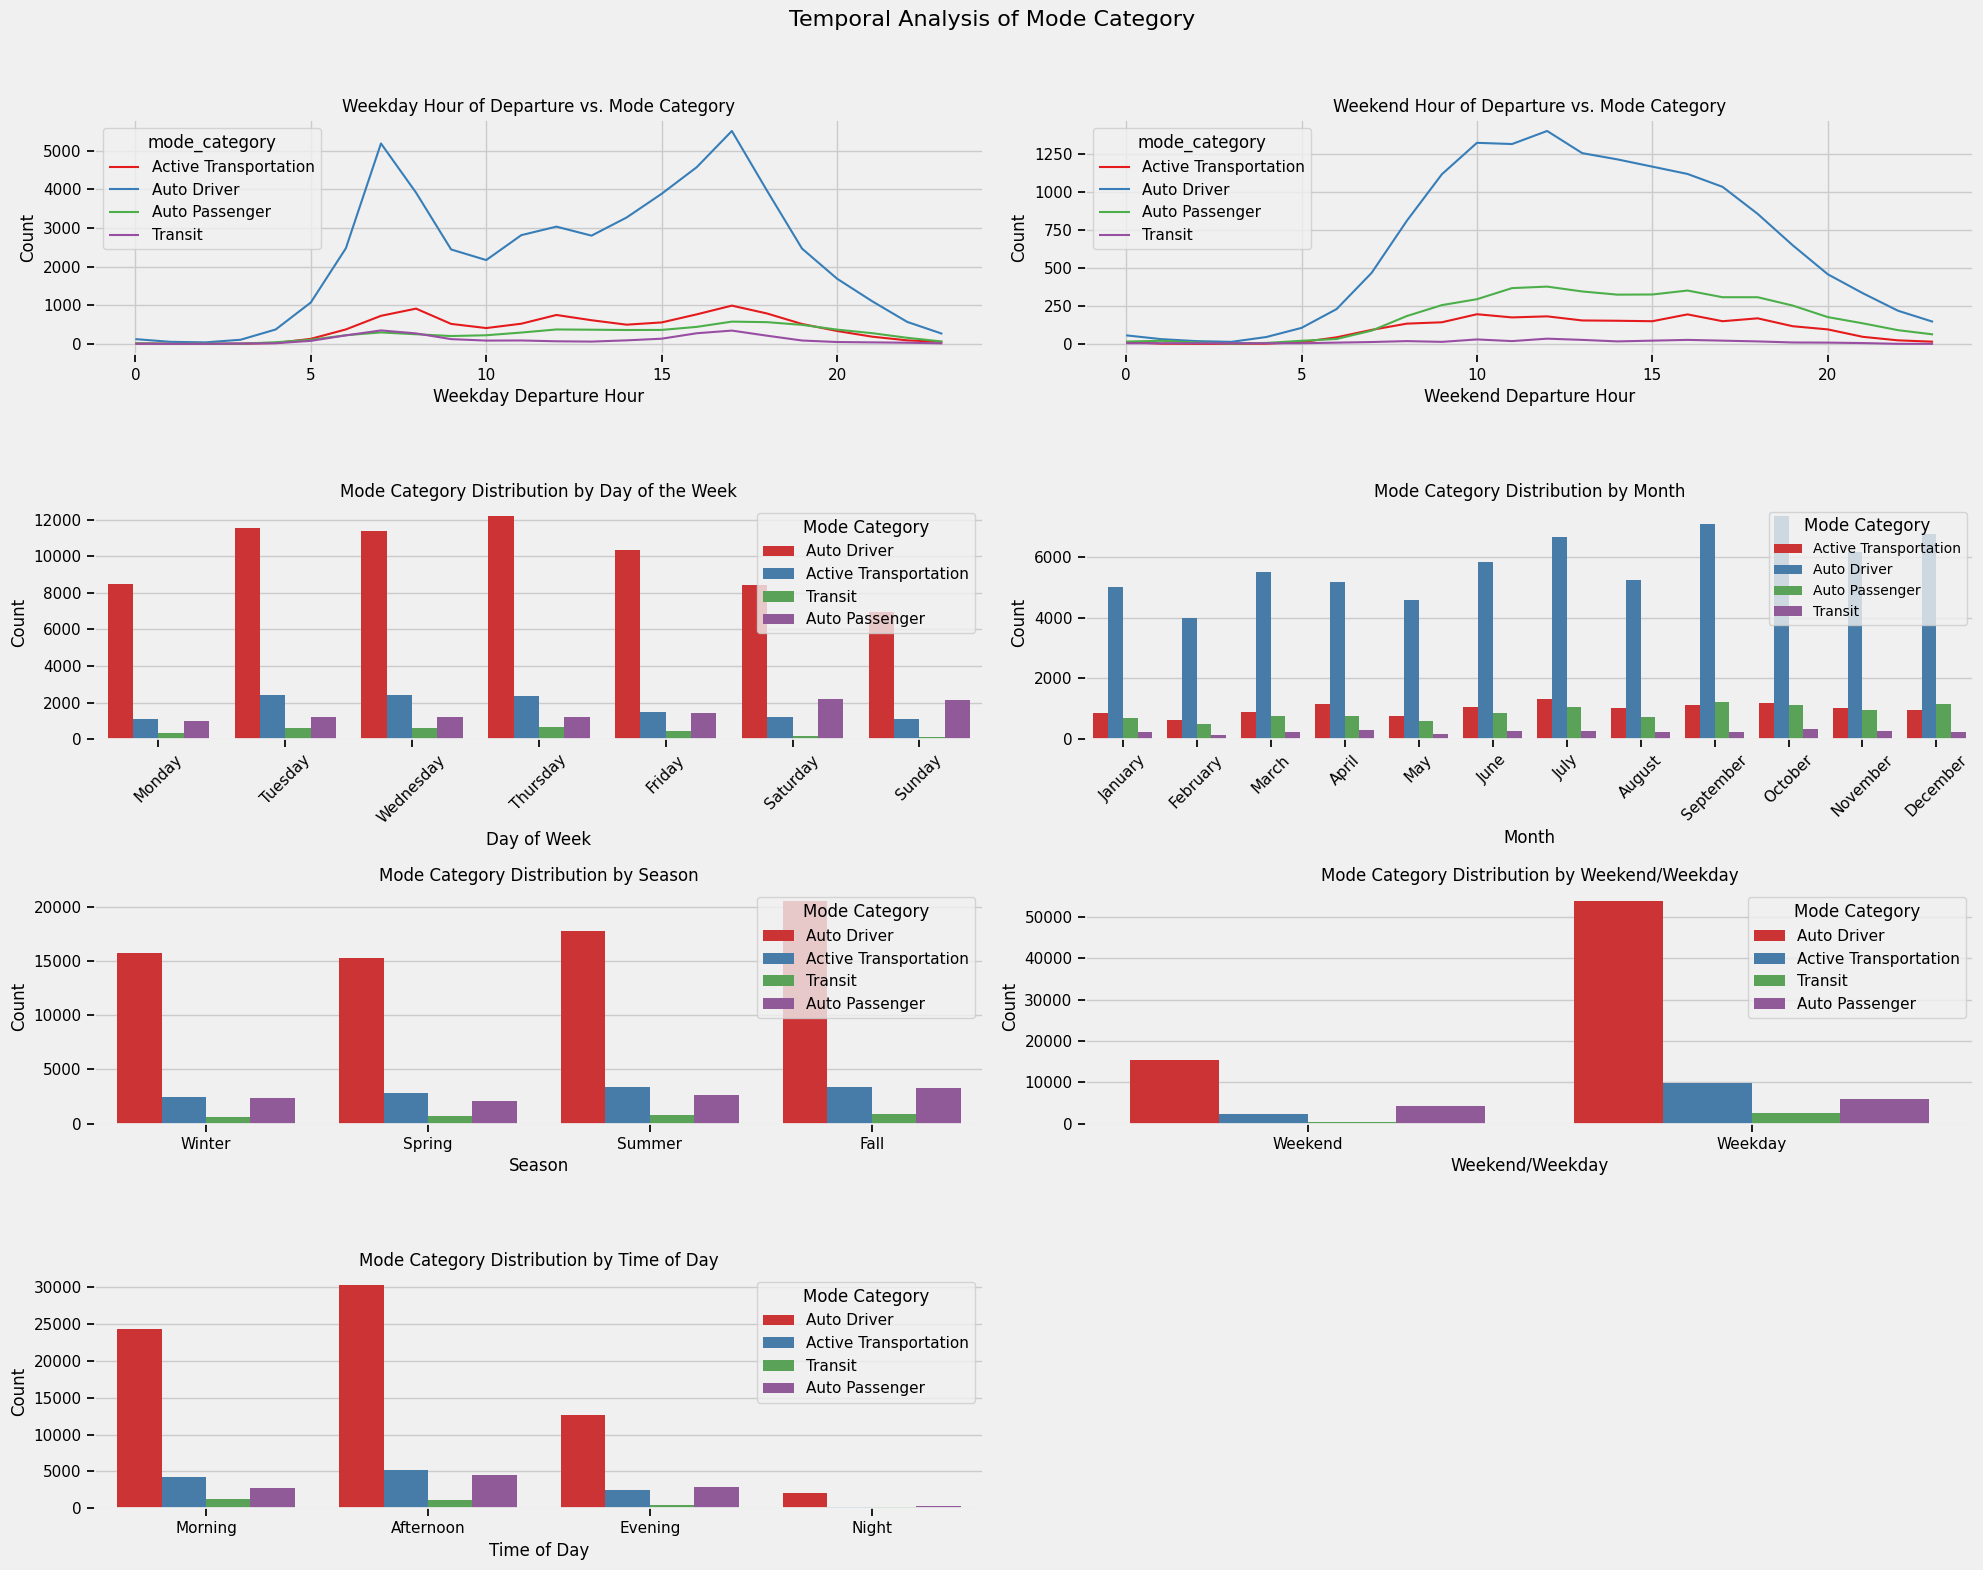

In [21]:
# Ensure 'departure_datetime' is in datetime format
df_filtered['departure_datetime'] = pd.to_datetime(df_filtered['departure_datetime'])

# Create necessary temporal features
df_filtered['departure_hour'] = df_filtered['departure_datetime'].dt.hour
df_filtered['day_of_week'] = df_filtered['departure_datetime'].dt.day_name()
df_filtered['month'] = pd.Categorical(
    df_filtered['departure_datetime'].dt.strftime('%B'),
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Map seasons
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df_filtered['season'] = df_filtered['departure_datetime'].dt.month.map(seasons)

# Create 'is_weekend' feature
df_filtered['is_weekend'] = df_filtered['day_of_week'].isin(['Saturday', 'Sunday']).replace({True: 'Weekend', False: 'Weekday'})

# Map times of the day
def map_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_filtered['time_of_day'] = df_filtered['departure_hour'].apply(map_time_of_day)

# Create the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 16))
fig.suptitle('Temporal Analysis of Mode Category', fontsize=16)

# Subplot 1: Line plot of weekday hour of departure vs. mode category
# Filter the days of the week to only include weekdays (Monday to Friday)
selected_days_wd = df_filtered[df_filtered['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
hourly_data_wd = selected_days_wd.groupby(['departure_hour', 'mode_category']).size().reset_index(name='count')
sns.lineplot(data=hourly_data_wd, x='departure_hour', y='count', hue='mode_category', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Weekday Hour of Departure vs. Mode Category')
axes[0, 0].set_xlabel('Weekday Departure Hour')
axes[0, 0].set_ylabel('Count')

# Subplot 2: Line plot of hour of departure vs. mode category
# Filter the days of the week to only include weekends (Saturday and Sunday)
selected_days_we = df_filtered[df_filtered['day_of_week'].isin(['Saturday', 'Sunday'])]
hourly_data_we = selected_days_we.groupby(['departure_hour', 'mode_category']).size().reset_index(name='count')
sns.lineplot(data=hourly_data_we, x='departure_hour', y='count', hue='mode_category', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Weekend Hour of Departure vs. Mode Category')
axes[0, 1].set_xlabel('Weekend Departure Hour')
axes[0, 1].set_ylabel('Count')

# Subplot 3: Mode category distribution by day of week
sns.countplot(data=df_filtered, x='day_of_week', hue='mode_category', palette='Set1',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[1, 0])
axes[1, 0].set_title('Mode Category Distribution by Day of the Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Mode Category')
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Mode category distribution by month
monthly_data = df_filtered.groupby(['month', 'mode_category']).size().reset_index(name='count')
sns.barplot(data=monthly_data, x='month', y='count', hue='mode_category', palette='Set1',
             ax=axes[1, 1])
axes[1, 1].set_title('Mode Category Distribution by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Mode Category', loc='best', fontsize=10)

# Subplot 5: Mode category distribution by season
sns.countplot(data=df_filtered, x='season', hue='mode_category', palette='Set1', ax=axes[2, 0],
              order=['Winter', 'Spring', 'Summer', 'Fall'])
axes[2, 0].set_title('Mode Category Distribution by Season')
axes[2, 0].set_xlabel('Season')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Mode Category')

# Subplot 6: Mode category distribution by weekend/weekday
sns.countplot(data=df_filtered, x='is_weekend', hue='mode_category', palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title('Mode Category Distribution by Weekend/Weekday')
axes[2, 1].set_xlabel('Weekend/Weekday')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Mode Category')

# Subplot 7: Mode category distribution by time of day
sns.countplot(data=df_filtered, x='time_of_day', hue='mode_category', palette='Set1', 
              order=['Morning', 'Afternoon', 'Evening', 'Night'], ax=axes[3, 0])
axes[3, 0].set_title('Mode Category Distribution by Time of Day')
axes[3, 0].set_xlabel('Time of Day')
axes[3, 0].set_ylabel('Count')
axes[3, 0].legend(title='Mode Category')

# Remove the last empty subplot
fig.delaxes(axes[3, 1])  # Remove the 8th subplot (row 3, column 1)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [22]:
# # Convert 'travel_date' to datetime format
# df_filtered['travel_date'] = pd.to_datetime(df_filtered['travel_date'], errors='coerce')

# # Convert 'dep_time' to datetime format
# df_filtered['dep_time'] = pd.to_datetime(df_filtered['dep_time'], errors='coerce')

# # Extract hour of day from 'dep_time'
# df_filtered['dep_time_hr'] = df_filtered['dep_time'].dt.hour

# # Extract the day of the week from 'travel_date'
# df_filtered['day_of_week'] = df_filtered['travel_date'].dt.dayofweek

# # Filter the days of the week to only include weekdays (Monday to Friday)
# selected_days = df_filtered[df_filtered['day_of_week'].isin([0, 1, 2, 3, 4])]

# # List of mode categories to include
# mode_categories = ['Active Transportation', 'Auto Passenger', 'Auto Driver', 'Transit']

# # Filter data for the selected mode categories
# selected_days = selected_days[selected_days['mode_category'].isin(mode_categories)]

# # Group by hour and mode category, and count the rides
# rides_per_hour_mode = (
#     selected_days.groupby(['dep_time_hr', 'mode_category'])
#     .size()
#     .reset_index(name='count')
# )

# # Pivot the data for easier plotting
# rides_pivot = rides_per_hour_mode.pivot(index='dep_time_hr', columns='mode_category', values='count').fillna(0)

# # Plot the data
# plt.figure(figsize=(12, 8))

# for mode in mode_categories:
#     plt.plot(rides_pivot.index, rides_pivot[mode], marker='o', label=mode)

# # Adding labels and title
# plt.title('Number of Rides per Hour for Weekdays by Mode Category')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Number of Rides')
# plt.legend(title='Mode Category')
# plt.grid(True)
# plt.xticks(range(0, 24))  # Set x-axis ticks for each hour
# plt.show()


# Geospatial Features EDA

In [23]:
df_non_numeric['city_from_zip'].unique()

array(['Greater Los Angeles Area', 'Stockton Area',
       'San Francisco Bay Area', 'Sacramento Area', 'Fresno Area',
       'San Diego County', 'Riverside-San Bernardino', 'Bakersfield Area'],
      dtype=object)

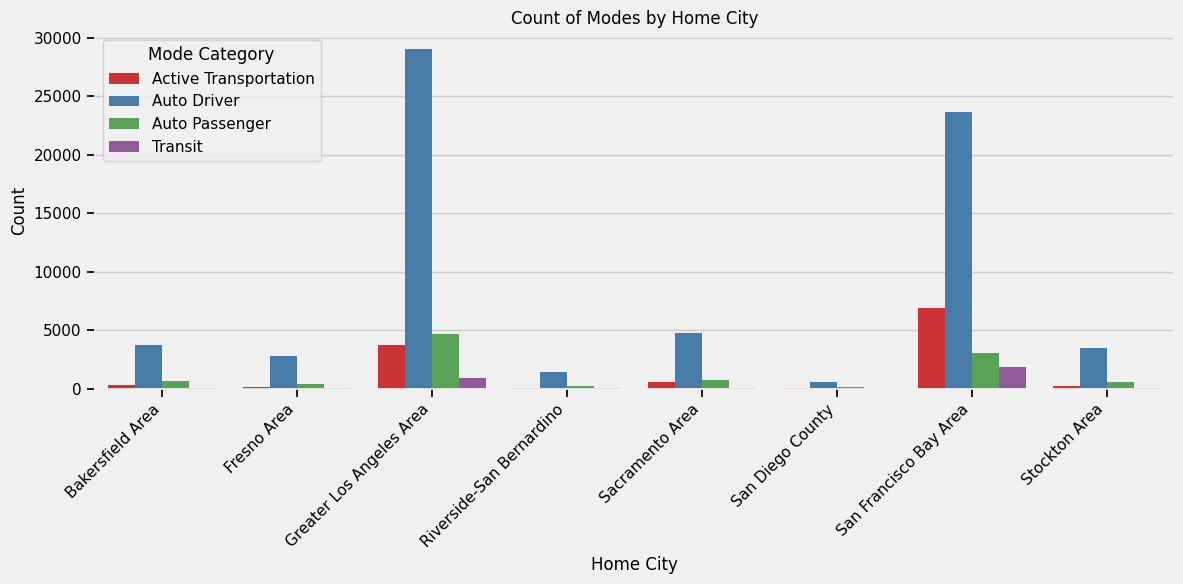

In [24]:
# Group by 'home_city' and 'mode_category' to get counts
home_city_mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=home_city_mode_counts, x='city_from_zip', y='count', hue='mode_category', palette='Set1')

# Customize the plot
plt.title('Count of Modes by Home City')
plt.xlabel('Home City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mode Category')
plt.tight_layout()

plt.show()

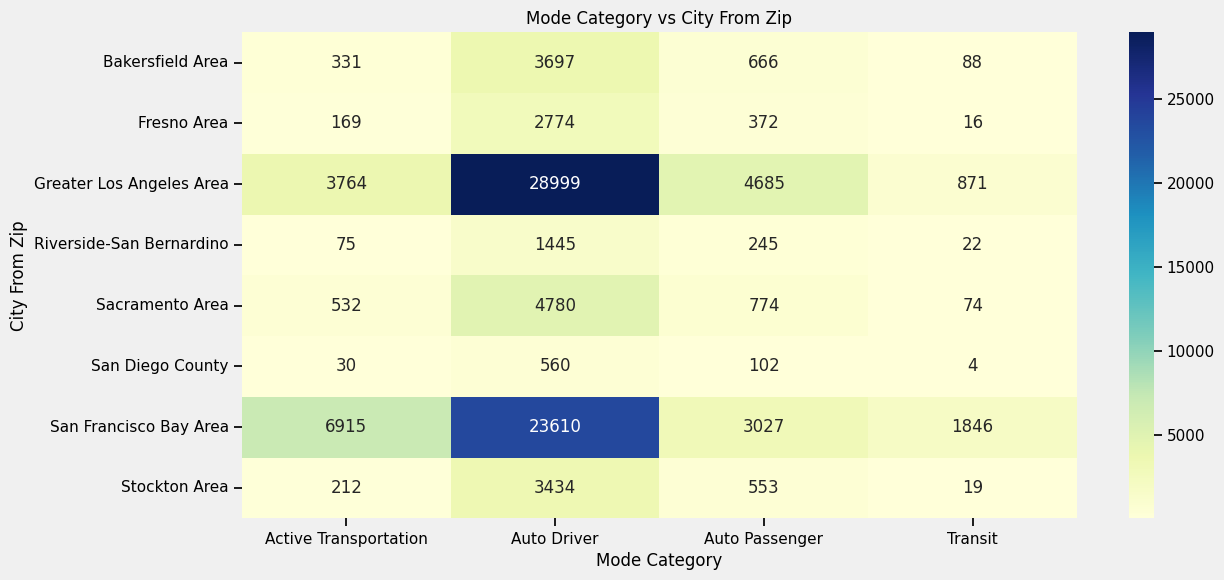

In [25]:
# Create a crosstab for city_from_zip and mode_category
city_mode_crosstab = pd.crosstab(df_filtered['city_from_zip'], df_filtered['mode_category'])

# Heatmap for better visualization
plt.figure(figsize=(12, 6))
sns.heatmap(city_mode_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mode Category vs City From Zip')
plt.xlabel('Mode Category')
plt.ylabel('City From Zip')
plt.show()

In [26]:
import folium
from folium import Circle
from folium.plugins import HeatMap

In [27]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Create the map centered around California
map_center = (36.7783, -119.4179)
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each area, color-coded by mode category
for area, coords in area_centers.items():
    area_modes = mode_counts[mode_counts['city_from_zip'] == area]
    
    # For simplicity, we are color-coding by mode_category, you can modify this based on the logic you want
    for _, row in area_modes.iterrows():
        mode = row['mode_category']
        count = row['count']
        
        # Set color based on the mode (you can customize the colors)
        mode_colors = {
            'Auto Driver': 'gray',
            'Auto Passenger': 'blue',
            'Transit': 'green',
            'Active Transportation': 'orange',
            'Other': 'red'
        }
        
        # Add a circle marker with color based on the mode
        folium.CircleMarker(
            location=coords,
            radius=count / 150,  # Adjust size based on count (you can modify this factor)
            color=mode_colors.get(mode, 'gray'),
            fill=True,
            fill_color=mode_colors.get(mode, 'gray'),
            fill_opacity=0.2,
            popup=f'{area}: {mode} ({count})'
        ).add_to(m)

# Create HTML for legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
    ">
    <b>Mode Legend</b><br>
    <i style="background: gray; width: 12px; height: 12px; display: inline-block; margin-right: 6px;"></i> Auto Driver<br>
    <i style="background: blue; width: 12px; height: 12px; display: inline-block; margin-right: 6px;"></i> Auto Passenger<br>
    <i style="background: green; width: 12px; height: 12px; display: inline-block; margin-right: 6px;"></i> Transit<br>
    <i style="background: orange; width: 12px; height: 12px; display: inline-block; margin-right: 6px;"></i> Active Transportation<br>
    <i style="background: red; width: 12px; height: 12px; display: inline-block; margin-right: 6px;"></i> Other
</div>
'''

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

In [28]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Mode color dictionary for heatmap
mode_colors = {
    'Auto Driver': 'yellow',
    'Auto Passenger': 'blue',
    'Transit': 'green',
    'Active Transportation': 'orange',
    'Other': 'red'
}

# Function to generate a heatmap for a specific mode
def create_heatmap_for_mode(mode):
    # Filter the mode data
    mode_data = mode_counts[mode_counts['mode_category'] == mode]
    
    # Create a map centered around California
    map_center = (36.7783, -119.4179)
    m = folium.Map(location=map_center, zoom_start=6)
    
    # Prepare data for the heatmap (latitude, longitude, intensity)
    heat_data = []
    for _, row in mode_data.iterrows():
        city = row['city_from_zip']
        count = row['count']
        coords = area_centers[city]
        
        # Add the data point (latitude, longitude, intensity)
        heat_data.append([coords[0], coords[1], count])
    
    # Add heatmap layer for this mode
    HeatMap(heat_data, min_opacity=0.3, max_val=max(mode_counts['count']), radius=25, blur=5, gradient={0: 'gray', 0.5: mode_colors[mode], 1: mode_colors[mode]}).add_to(m)
    # just print it for now 
    # Save the map to an HTML file just print it for now 
    #m.save(f"heatmap_{mode}.html")
    return m

# Generate separate maps for each mode
for mode in mode_colors.keys():
    print(mode)
    create_heatmap_for_mode(mode)



Auto Driver
Auto Passenger
Transit
Active Transportation
Other


In [29]:
# create_heatmap_for_mode('Active Transportation')
create_heatmap_for_mode('Auto Driver')
# create_heatmap_for_mode('Transit')
# create_heatmap_for_mode('Auto Passenger')
# create_heatmap_for_mode('Other')

#### Feature Enginnering

In [30]:
df_filtered

,tottr,hhmem,mode_category,duration_min,trip_distance_miles,city_from_zip,gender,age,citizen,driver_license,...,transmission,cylinders,veh_type,departure_datetime,departure_hour,day_of_week,month,season,is_weekend,time_of_day
0,3.0,2.0,Auto Driver,20.0,3.619057,Greater Los Angeles Area,1.0,46.0,1.0,1.0,...,1.0,4.0,2.0,2012-05-12 08:15:00,8,Saturday,May,Spring,Weekend,Morning
1,5.0,4.0,Auto Driver,20.0,3.587950,Greater Los Angeles Area,1.0,46.0,1.0,1.0,...,1.0,4.0,2.0,2012-05-12 15:30:00,15,Saturday,May,Spring,Weekend,Afternoon
2,2.0,1.0,Auto Driver,25.0,19.351621,Greater Los Angeles Area,1.0,46.0,1.0,1.0,...,1.0,4.0,2.0,2012-05-12 16:30:00,16,Saturday,May,Spring,Weekend,Afternoon
3,2.0,1.0,Auto Driver,15.0,6.451126,Greater Los Angeles Area,1.0,46.0,1.0,1.0,...,1.0,4.0,2.0,2012-05-12 17:40:00,17,Saturday,May,Spring,Weekend,Afternoon
4,2.0,1.0,Auto Driver,20.0,17.657172,Greater Los Angeles Area,1.0,46.0,1.0,1.0,...,1.0,4.0,2.0,2012-05-12 18:40:00,18,Saturday,May,Spring,Weekend,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95112,1.0,0.0,Auto Driver,4.0,0.181507,San Francisco Bay Area,1.0,45.0,1.0,1.0,...,0.0,0.0,0.0,2013-01-30 15:58:00,15,Wednesday,January,Winter,Weekday,Afternoon
95113,1.0,0.0,Auto Driver,14.0,2.674467,San Francisco Bay Area,1.0,45.0,1.0,1.0,...,0.0,0.0,0.0,2013-01-30 16:33:00,16,Wednesday,January,Winter,Weekday,Afternoon
95114,1.0,0.0,Active Transportation,17.0,2.621383,San Francisco Bay Area,1.0,45.0,1.0,1.0,...,0.0,0.0,0.0,2013-01-30 17:08:00,17,Wednesday,January,Winter,Weekday,Afternoon
95115,1.0,0.0,Active Transportation,94.0,10.356760,San Francisco Bay Area,1.0,45.0,1.0,1.0,...,0.0,0.0,0.0,2013-01-30 17:43:00,17,Wednesday,January,Winter,Weekday,Afternoon


In [31]:
import ast

# First convert the units column into an actual list
df_filtered.loc[:, 'workday_range'] = df_filtered['workday_range'].str.strip("[]").str.replace("'", "").str.split(", ")

# Function to handle 'nan' and numbers in a string list
def convert_list_to_int_or_nan(x):
    if isinstance(x, str):
        # Convert string to list using ast.literal_eval
        x = ast.literal_eval(x)

    # Now process the list, convert numeric strings to int and 'nan' to np.nan
    result = []
    for val in x:
        if isinstance(val, str):
            # If it's a string number (e.g., '5.0', '6.0'), convert to float or int
            if val.lower() != 'nan':
                result.append(int(float(val)))  # Convert numeric string to an integer
            else:
                result.append(np.nan)  # Replace 'nan' string with np.nan
        elif isinstance(val, (float, int)):
            result.append(int(val))  # Convert numeric types to integer
        else:
            result.append(np.nan)  # Handle non-numeric values

    return result

# Apply this function to the 'workday_range' column
df_filtered.loc[:, 'workday_range'] = df_filtered['workday_range'].apply(convert_list_to_int_or_nan)

In [32]:
def check_workday(travel_date, workday_range):
    # If the person works Monday to Friday (8)
    if 8 in workday_range:
        if travel_date == 5 or travel_date == 6:  # Saturday (5) or Sunday (6)
            return 2  # Not a workday
        else:
            return 1  # Monday to Friday is a workday
    # If the person works on specific days in workday_range (1-7)
    elif (travel_date + 1) in workday_range:  # Convert travel_date 0-6 to 1-7 (Monday=1, Sunday=7)
        return 1  # It is a workday
    else:
        return 2  # Not a workday


# Create a new dat of week column with numerical days of week
df_filtered['day_of_week_num'] = df_filtered['departure_datetime'].dt.dayofweek

# Apply the function to the DataFrame
df_filtered['is_workday'] = df_filtered.apply(lambda row: check_workday(row['day_of_week_num'], row['workday_range']), axis=1)


# Display the updated DataFrame with the new 'is_workday' column
print(df_filtered[['day_of_week_num', 'workday_range', 'is_workday']])

       day_of_week_num                      workday_range  is_workday
0                    5  [8, nan, nan, nan, nan, nan, nan]           2
1                    5  [8, nan, nan, nan, nan, nan, nan]           2
2                    5  [8, nan, nan, nan, nan, nan, nan]           2
3                    5  [8, nan, nan, nan, nan, nan, nan]           2
4                    5  [8, nan, nan, nan, nan, nan, nan]           2
...                ...                                ...         ...
95112                2  [8, nan, nan, nan, nan, nan, nan]           1
95113                2  [8, nan, nan, nan, nan, nan, nan]           1
95114                2  [8, nan, nan, nan, nan, nan, nan]           1
95115                2  [8, nan, nan, nan, nan, nan, nan]           1
95116                1  [8, nan, nan, nan, nan, nan, nan]           1

[94691 rows x 3 columns]


In [33]:
def feature_engineering(data):
    data_copy = data.copy()
    return data_copy


In [34]:
print(df_filtered.columns.tolist())


['tottr', 'hhmem', 'mode_category', 'duration_min', 'trip_distance_miles', 'city_from_zip', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'job_count', 'empl_sec_loc', 'workday_count', 'hour_per_week', 'workday_flex', 'commute_mode', 'empl_industry', 'empl_occupation', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'education', 'person_trips', 'race', 'workday_range', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'vehicle_op_count', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinders', 'veh_type', 'departure_datetime', 'depart

#### Feature Selection

In [35]:
def selected_feature(data):
    
    feature_selected = ['tottr',
                        'gender',
                        'race',
                        'age',
                        'citizen',
                        'incentive',
                        'vehicle_count',
                        'income',
                        'worker_count',
                        'is_workday',
                        'workday_count',
                        'driver_license',
                        'job_count',
                        'apparent_temperature_mean (°C)',
                        'WMO_code']

    selected_data = data[feature_selected]
    
    return selected_data

#### Train the Model

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assume df is your DataFrame and 'y' is the target column

# Step 1: Split the data into train (70%) and temp (30%)
train_df, temp_df = train_test_split(df_filtered, test_size=0.3, stratify=df_filtered['mode_category'], random_state=42)

# Step 2: Split the temp set into validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['mode_category'], random_state=42)

# Step 3: Separate features (X) and target (y) for the training set
X_train = selected_feature(train_df)
y_train = train_df['mode_category']

# Step 4: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Print class distribution after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Step 6: Separate features and target for validation and test sets
X_val = selected_feature(val_df)
y_val = val_df['mode_category']

X_test = selected_feature(test_df)
y_test = test_df['mode_category']

# Outputs
print(f"Training set size: {X_train_resampled.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Class distribution before SMOTE: Counter({'Auto Driver': 48509, 'Active Transportation': 8419, 'Auto Passenger': 7297, 'Transit': 2058})
Class distribution after SMOTE: Counter({'Auto Driver': 48509, 'Auto Passenger': 48509, 'Transit': 48509, 'Active Transportation': 48509})
Training set size: 194036
Validation set size: 14204
Test set size: 14204


In [38]:
model = RandomForestClassifier(random_state=42)

# Fit and predict
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_val)

#### Check the performance of the model

In [40]:
accuracy = accuracy_score(y_val, y_pred)

print(f"Accuracy of the Random Forest Classifier: {accuracy * 100:.2f}%")

Accuracy of the Random Forest Classifier: 85.07%


In [41]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)

print(f"Cross-Validated Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validated Accuracy: 90.32%


In [42]:
from sklearn.metrics import classification_report, f1_score

# Step 1: Check class distribution
unique, counts = np.unique(y_val, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

# Step 2: Generate classification report
report = classification_report(y_val, y_pred, target_names=['Active Transportation', 'Auto Driver', 'Auto Passenger', 'Transit'], digits=3)
print("\nClassification Report:\n", report)

# Step 3: Calculate weighted F1-score
weighted_f1 = f1_score(y_val, y_pred, average='weighted')
print("\nWeighted F1-Score:", weighted_f1)

Class Distribution: {'Active Transportation': np.int64(1804), 'Auto Driver': np.int64(10395), 'Auto Passenger': np.int64(1564), 'Transit': np.int64(441)}

Classification Report:
                        precision    recall  f1-score   support

Active Transportation      0.571     0.545     0.558      1804
          Auto Driver      0.928     0.929     0.929     10395
       Auto Passenger      0.857     0.825     0.841      1564
              Transit      0.270     0.351     0.305       441

             accuracy                          0.851     14204
            macro avg      0.656     0.663     0.658     14204
         weighted avg      0.855     0.851     0.852     14204


Weighted F1-Score: 0.8524604441896525



Top 10 Important Features:
                           Feature  Importance
0                            tottr    0.261496
13  apparent_temperature_mean (°C)    0.139789
3                              age    0.131810
6                    vehicle_count    0.076556
14                        WMO_code    0.074153
7                           income    0.064460
10                   workday_count    0.053364
1                           gender    0.049524
2                             race    0.025739
4                          citizen    0.025049


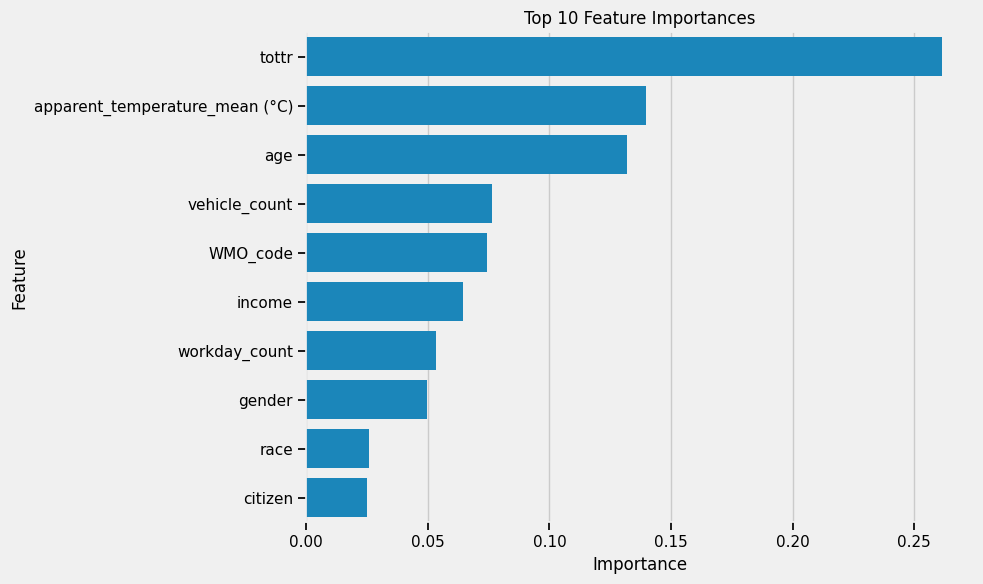

In [43]:
# Feature importances
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

EDA has been completed. The next step is to take the worker dataset and perform feature engineering.  

In [ ]:
df_filtered.to_csv('Worker_EDA_Complete.csv', index=False)